Data Importing and Pre-processing

Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

Clean, wrangle, and handle missing data

Transform data appropriately using techniques such as aggregation, normalization, and feature construction

Reduce redundant data and perform need based discretization

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [2]:
# Importing the data from it's CSV and TXT files, stored in several nested folders in my Desktop

dataset1 = pd.read_csv('/Users/kalelcoleman/Desktop/ADS 500B/Final project data sets/Dataset 1 (Bank Marketing)/bank_marketing.csv',
                               sep=';')

with open('/Users/kalelcoleman/Desktop/ADS 500B/Final project data sets/Dataset 1 (Bank Marketing)/README.txt', 'r') as file:
    readme_content = file.read()

dataset1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# Displaying the data's associated README.txt file

display(Markdown(readme_content))

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
The dataset is ordered by date (from May 2008 to November 2010).

Origin: UCI Machine Learning Repository
File Type: CSV
File Size: 3.7 MB
Modeling Problem: Classification
Missing Values: Yes

Dataset variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  17 - deposit: has the client subscribed a term deposit? (binary: "yes","no") (dependent variable)


In [4]:
# Below is the dimension of the data frame, as well as each column's data type and its number of Non-Null entries

dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


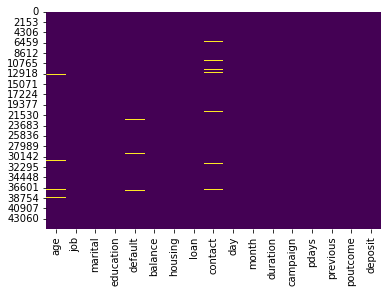

In [5]:
# Quick visualization of NA values

sns.heatmap(dataset1.isna(), cbar=False, cmap='viridis')
plt.show()

In [6]:
# Taking a look at all rows with at least one NA value

data_na = dataset1[dataset1.isna().any(axis=1)]
data_na

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no
16,45.0,admin.,single,unknown,NaN,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
21,NaN,management,married,tertiary,no,779,yes,no,unknown,5,may,164,1,-1,0,unknown,no
22,32.0,blue-collar,single,primary,NaN,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,no
28,NaN,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45148,22.0,student,single,secondary,NaN,2488,no,no,cellular,8,nov,449,2,38,10,other,yes
45158,NaN,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no
45166,41.0,unemployed,single,tertiary,no,79,no,no,NaN,9,nov,394,1,390,2,success,yes
45170,NaN,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no


In [7]:
# As one may see, we must define a range for the balance column to use .groupby() meaningfully

testing = dataset1.copy()

testing.groupby(['job', 'marital', 'education', 'balance', 'housing', 'loan']).mean().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32198 entries, ('admin.', 'divorced', 'primary', -347, 'yes', 'no') to ('unknown', 'single', 'unknown', 18881, 'no', 'no')
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       31459 non-null  float64
 1   day       32198 non-null  float64
 2   duration  32198 non-null  float64
 3   campaign  32198 non-null  float64
 4   pdays     32198 non-null  float64
 5   previous  32198 non-null  float64
dtypes: float64(6)
memory usage: 1.7+ MB


In [8]:
dataset1['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [9]:
dataset1['contact'].describe()

count        43828
unique           3
top       cellular
freq         28410
Name: contact, dtype: object

In [10]:
dataset1['contact']

0          unknown
1          unknown
2          unknown
3          unknown
4              NaN
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length: 45211, dtype: object

Number of rows with missing values after cleaning data: 57


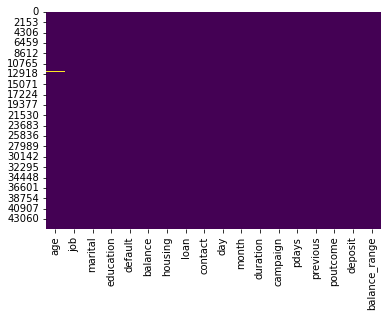

In [19]:
# Create balance_range column
balance_min = dataset1['balance'].min()
balance_max = dataset1['balance'].max()
balance_step = 500
bins = np.arange(balance_min, balance_max + balance_step, balance_step)
labels = [f'{i}-{i + balance_step - 1}' for i in bins[:-1]]
testing['balance_range'] = pd.cut(testing['balance'], bins=bins, right=False, labels=labels)

# Fill missing values
testing['contact'].fillna('unknown', inplace=True)

# Fill missing values in 'default' column based on reasonable conditions
testing.loc[testing['default'].isna() & (testing['balance'] < 0), 'default'] = 'yes'
testing.loc[testing['default'].isna() & (testing['balance'] < 100) & (testing['loan'] == 'yes'), 'default'] = 'yes'
testing.loc[testing['default'].isna(), 'default'] = 'no'

# Fill missing values in numeric columns with group means
numeric_column = ['age']
for col in numeric_column:
    testing[col] = testing.groupby(['job', 'marital', 'education', 'housing', 'loan', 'balance_range'])[col].transform(lambda x: x.fillna(x.mean()))

# Check if there are still any missing values
testing_na = testing[testing.isna().any(axis=1)]
print(f"Number of rows with missing values after cleaning data: {len(testing_na)}")

# Quick visualization of remaining NA values
sns.heatmap(testing.isna(), cbar=False, cmap='viridis')
plt.show()


In [21]:
testing_na.count()

age               0
job              57
marital          57
education        57
default          57
balance          57
housing          57
loan             57
contact          57
day              57
month            57
duration         57
campaign         57
pdays            57
previous         57
poutcome         57
deposit          57
balance_range    57
dtype: int64

Number of rows with missing values after cleaning data: 57


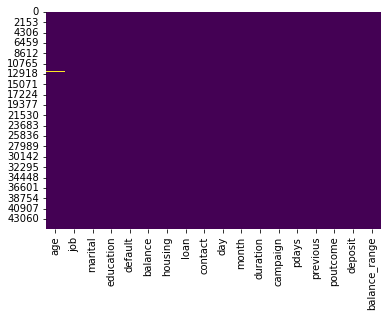

Replacement tracking DataFrame:
   Index  Assumed Age                                          Rationale
0     21          NaN    management, married, tertiary, yes, no, 481-980
1     28          NaN   management, single, secondary, yes, no, -519--20
2     41          NaN   management, married, secondary, yes, no, -19-480
3    114          NaN       retired, divorced, primary, yes, no, -19-480
4    167          NaN  technician, married, secondary, yes, no, 981-1480


In [22]:


# Copy the dataset to avoid modifying the original
testing2 = dataset1.copy()

# Create balance_range column
balance_min = dataset1['balance'].min()
balance_max = dataset1['balance'].max()
balance_step = 500
bins = np.arange(balance_min, balance_max + balance_step, balance_step)
labels = [f'{i}-{i + balance_step - 1}' for i in bins[:-1]]
testing2['balance_range'] = pd.cut(testing2['balance'], bins=bins, right=False, labels=labels)

# Fill missing values in 'contact' column
testing2['contact'].fillna('unknown', inplace=True)

# Initialize DataFrame to track replacements
replacement_tracking = pd.DataFrame(columns=['Index', 'Assumed Age', 'Rationale'])

# Fill missing values in 'age' column with group means and track replacements
numeric_column = ['age']

for col in numeric_column:
    # Calculate group means
    group_means = testing2.groupby(['job', 'marital', 'education', 'housing', 'loan'])[col].mean()
    
    # Tracking the total number of 'age' replacements
    age_replacement_cnt = 0
    
    # Function to get assumed age and rationale
    def get_assumed_age_and_rationale(row):
        
        # Avoid the total replacement count from reinitializing
        global age_replacement_cnt
        
        if pd.isna(row[col]):
            age_replacement_cnt += 1
            group_key = (row['job'], row['marital'], row['education'], row['housing'], row['loan'], row['balance_range'])
            assumed_age = group_means.get(group_key, np.nan)
            rationale = ', '.join(map(str, group_key))
            replacement_tracking.loc[len(replacement_tracking)] = [row.name, assumed_age, rationale]
            return assumed_age
        else:
            return row[col]

    # Apply function to track replacements and fill missing values
    testing2[col] = testing2.apply(get_assumed_age_and_rationale, axis=1)

# Fill missing values in 'default' column based on reasonable conditions
testing2.loc[testing2['default'].isna() & (testing2['balance'] < 0), 'default'] = 'yes'
testing2.loc[testing2['default'].isna() & (testing2['balance'] < 100) & (testing2['loan'] == 'yes'), 'default'] = 'yes'
testing2.loc[testing2['default'].isna(), 'default'] = 'no'

# Fill missing values in numeric columns with group means
numeric_columns = ['age']
for col in numeric_columns:
    testing2[col] = testing2.groupby(['job', 'marital', 'education', 'housing', 'loan', 'balance_range'])[col].transform(lambda x: x.fillna(x.mean()))

# Check if there are still any missing values
testing2_na = testing2[testing2.isna().any(axis=1)]
print(f"Number of rows with missing values after cleaning data: {len(testing2_na)}")

# Quick visualization of remaining NA values
sns.heatmap(testing2.isna(), cbar=False, cmap='viridis')
plt.show()

# Display the replacement tracking DataFrame
print("Replacement tracking DataFrame:")
print(replacement_tracking.head())


In [23]:
age_replacement_cnt

1339

In [24]:
data_na['age'].count()

2572

In [25]:
replacement_tracking

,Index,Assumed Age,Rationale
0,21,NaN,"management, married, tertiary, yes, no, 481-980"
1,28,NaN,"management, single, secondary, yes, no, -519--20"
2,41,NaN,"management, married, secondary, yes, no, -19-480"
3,114,NaN,"retired, divorced, primary, yes, no, -19-480"
4,167,NaN,"technician, married, secondary, yes, no, 981-1480"
...,...,...,...
1334,45094,NaN,"admin., single, secondary, yes, no, 1481-1980"
1335,45106,NaN,"technician, married, secondary, no, no, 481-980"
1336,45122,NaN,"entrepreneur, single, tertiary, yes, yes, -19-480"
1337,45158,NaN,"student, single, unknown, no, no, 1981-2480"
